# 前処理

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2
# !pip install scikit-learn==1.2.2
# !pip install xgboost==1.7.5
# !pip install lightgbm==3.3.5

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(xgb.__version__) 
print(lgb.__version__)

1.5.3
1.22.4
3.7.1
0.12.2
1.2.2
1.7.5
3.3.5


In [3]:
# Google Driveにマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ディレクトリ移動
%cd '/content/drive/MyDrive/Colab Notebooks/lightgbm_sample/chapter5'

In [5]:
!ls

exoTrain.csv
section5_1_simple_DecisionTreeRegressor.ipynb
section5_2_simple_GradientBoostingRegressor.ipynb
section5_3_simple_XGBoost.ipynb
section5_4_simple_LightGBM.ipynb
section5_5_exoplanets_LightGBM.ipynb


In [7]:
# データセットの読み込み
df = pd.read_csv('exoTrain.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [8]:
# データ形状
df.shape

(5087, 3198)

In [9]:
# データ型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [10]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [11]:
# 欠損値の有無
df.isnull().sum().sum()

0

In [13]:
# 正解ラベルの件数内訳
df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [14]:
# 前処理

# 正解ラベルの置換
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

# 置換後の正解ラベルの件数内訳
df['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [15]:
# 特徴量と目的変数の設定
X_train = df.drop(['LABEL'], axis=1)
y_train = df['LABEL']

#学習時間比較

In [16]:
# 実行時間の表示
import time
start = time.time()

df.info()

end = time.time()
elapsed = end - start

print('\nRun Time: ' + str(elapsed) + ' seconds.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

Run Time: 0.1002042293548584 seconds.


Run Time: 5.69851016998291 seconds


Text(50.722222222222214, 0.5, 'label')

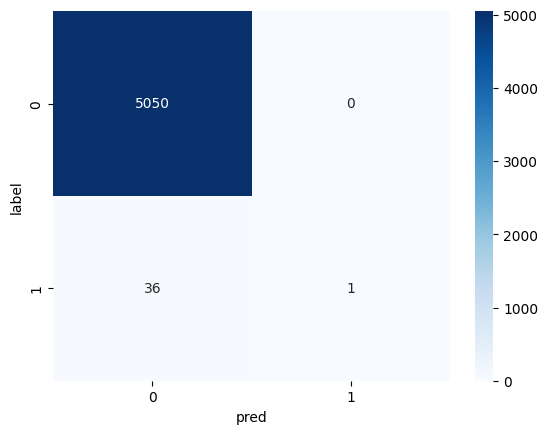

In [17]:
# DecisionTreeClassifierの実行時間

# DecisionTreeClassifierの学習
start = time.time()

model_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
model_tree.fit(X_train, y_train)
y_train_pred = model_tree.predict(X_train)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

Run Time: 436.3794515132904 seconds


Text(50.722222222222214, 0.5, 'label')

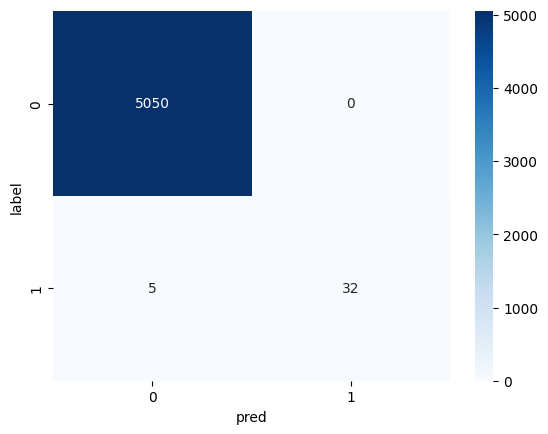

In [18]:
# GradientBoostingClassifierの実行時間

# GradientBoostingClassifierの学習
start = time.time()

model_gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, criterion='squared_error', random_state=0)
model_gbdt.fit(X_train, y_train)
y_train_pred = model_gbdt.predict(X_train)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

In [19]:
# XGBoostハイパーパラメータの設定

xgb_train = xgb.DMatrix(X_train, label=y_train)

params_xgb = {
    'objective': 'reg:logistic', # 損失関数
    'max_depth': 2, # 深さの最大値
    'learning_rate': 0.1, # 学習率
    'base_score': 0.5, # 初期値
    'min_child_weight': 1e-3, # 葉の2階微分の最小値
    'min_split_loss': 0, # 枝刈り
    'reg_alpha': 0, # L1正則化
    'reg_lambda': 0, # L2正則化
    'tree_method': 'auto', # 計算方法
    'nthread': 1, # スレッド数
    'seed': 0, # 乱数
}

Run Time: 123.41374015808105 seconds


Text(50.722222222222214, 0.5, 'label')

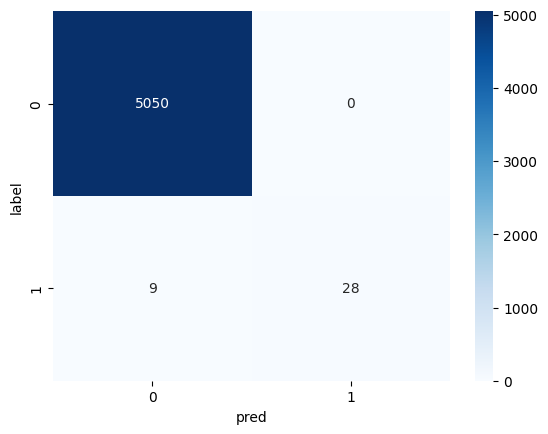

In [20]:
# XGBoostの実行時間

# XGBoostの学習
start = time.time()

model_xgb = xgb.train(params_xgb,
                      xgb_train,
                      num_boost_round=100)

y_train_pred_proba= model_xgb.predict(xgb.DMatrix(X_train))
y_train_pred = np.round(y_train_pred_proba)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

In [21]:
# LightGBMハイパーパラメータの設定
lgb_train = lgb.Dataset(X_train, y_train)

params_lgb = {
    'objective': 'binary', # 損失関数
    'max_depth': 2, # 深さの最大値
    'learning_rate': 0.1, # 学習率
    'min_data_in_leaf': 20, # 葉の最小のレコード数
    'min_sum_hessian_in_leaf': 1e-3, # 葉の2階微分の最小値
    'max_bin': 255, # ヒストグラムの最大のbin数 
    'min_data_in_bin': 3, # binの最小のレコード数
    'min_gain_to_split': 0, # 枝刈り
    'lambda_l1': 0, # L1正則化
    'lambda_l2': 0, # L2正則化
    'num_threads': 1, # スレッド数
    'seed': 0, # 乱数
    'verbose': -1, # ログ表示
}

Run Time: 15.343047857284546 seconds


Text(50.722222222222214, 0.5, 'label')

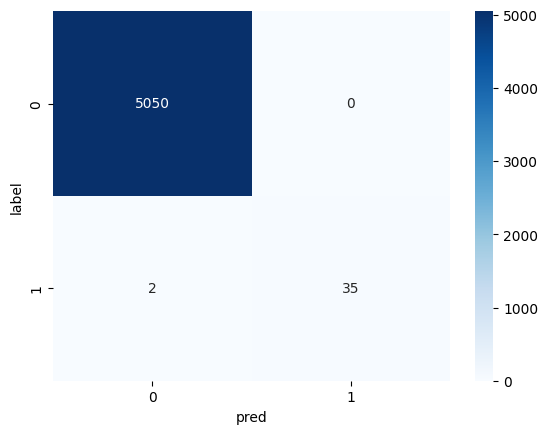

In [22]:
# LightGBMの実行時間

# LightGBMの学習
start = time.time()

model_lgb = lgb.train(params_lgb,
                      lgb_train,
                      num_boost_round=100)

y_train_pred_proba = model_lgb.predict(X_train)
y_train_pred = np.round(y_train_pred_proba)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

#scikit-learn API（本には記載なし）

Run Time: 118.28631734848022 seconds


Text(50.722222222222214, 0.5, 'label')

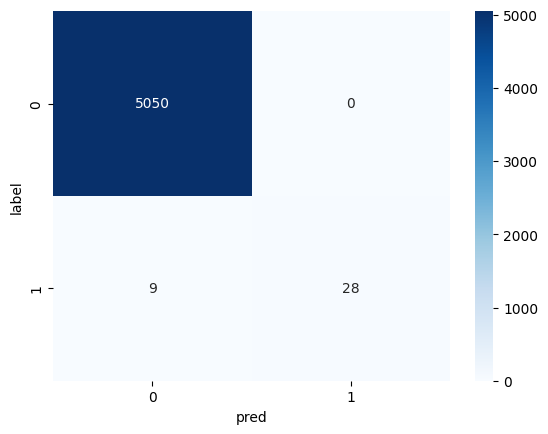

In [23]:
# XGBoostの実行時間（scikit-learn API）
from xgboost import XGBClassifier

# XGBoost分類の学習
start = time.time()

model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, reg_lambda=0, min_child_weight=1e-3, nthread=1, random_state=0)
model_xgb.fit(X_train, y_train)
y_train_pred = model_xgb.predict(X_train)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
Run Time: 14.331342935562134 seconds


Text(50.722222222222214, 0.5, 'label')

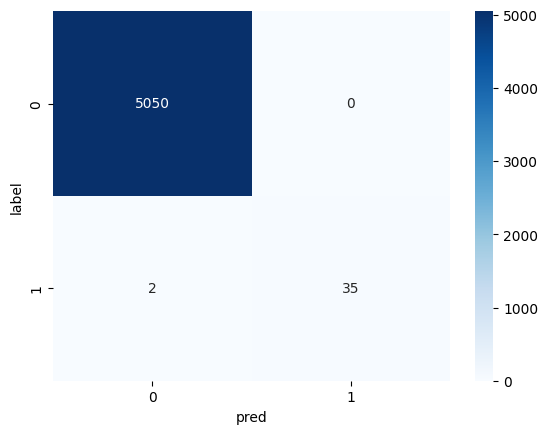

In [24]:
# LightGBMの実行時間（scikit-learn API）
from lightgbm import LGBMClassifier

# LigitGBM分類の学習
start = time.time()

model_lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, num_threads=1, random_state=0)
model_lgb.fit(X_train, y_train)
y_train_pred = model_lgb.predict(X_train)

end = time.time()

elapsed = end - start
print('Run Time: ' + str(elapsed) + ' seconds')

# 混同行列
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')